Importing required libraries to predict acceleration using random forest, calculate RMSE (RootMeanSquaredError), and create plots to compare predicted and actual acceleration

In [1]:
import pandas as pd
import numpy as np

#import src
import FileProcessing
import ModelClass
from asyncio.windows_events import NULL
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
import tensorflow
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import FileProcessing


In [2]:


def fit_lstm(model, X_train, y_train, X_val, y_val, reaction_time):
    modelName = "lstm_model" + str(reaction_time) + ".keras"
    save_callback = keras.callbacks.ModelCheckpoint(
        modelName, save_best_only=True)
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_accuracy', verbose=1, patience=7)
    history = model.fit(X_train, y_train, epochs=1, batch_size=16,
                        verbose=1, validation_data=(X_val, y_val), callbacks=[save_callback, early_stopping])
    # convertingt the accuracy of the model to a graph.
    # the dictionary that has the information on loss and accuracy per epoch
    history_dict = history.history

    loss_values = history_dict['loss']   # training loss
    val_loss_values = history_dict['val_loss']  # validation loss

    # creates list of integers to match the number of epochs of training
    epochs = range(1, len(loss_values)+1)

    # code to plot the results
    plt.plot(epochs, loss_values, 'b', label="Training Loss")
    plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.xticks(epochs)
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    # As above, but this time we want to visualize the training and validation accuracy
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']

    plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
    plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.xticks(epochs)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    return model


In [3]:
'''
def fit_and_run_neural(df, time_frame):
        shift_instance = time_frame*10
        df, train_df, val_df, test_df, X_train, y_train, X_val, y_val, X_test, y_test = model_obj.preprocessing(
            df, shift_instance)
        model = model_obj.define_neural_network(X_train)
        model = model_obj.fit_neural_network(
            model, X_train, y_train, X_val, y_val, time_frame)
        predict_on_pair = model_obj.prediction_test_pairs(test_df, 10, 12)
        predict_on_pair[0]
        print(f"Prediction being done on :{predict_on_pair[0]}")
        target_variable = 'nextframeAcc'
        return df, train_df, val_df, test_df, X_train, y_train, X_val, y_val, X_test, y_test, model
'''

'\ndef fit_and_run_neural(df, time_frame):\n        shift_instance = time_frame*10\n        df, train_df, val_df, test_df, X_train, y_train, X_val, y_val, X_test, y_test = model_obj.preprocessing(\n            df, shift_instance)\n        model = model_obj.define_neural_network(X_train)\n        model = model_obj.fit_neural_network(\n            model, X_train, y_train, X_val, y_val, time_frame)\n        predict_on_pair = model_obj.prediction_test_pairs(test_df, 10, 12)\n        predict_on_pair[0]\n        print(f"Prediction being done on :{predict_on_pair[0]}")\n        target_variable = \'nextframeAcc\'\n        return df, train_df, val_df, test_df, X_train, y_train, X_val, y_val, X_test, y_test, model\n'

Loading the cleaned ngsim data using pandas

In [4]:
fileProcessing=FileProcessing.FileProcessing()

In [5]:
model_obj=ModelClass.ModelClass()
file=FileProcessing.FileProcessing()

In [6]:
file_name='Cleaned_NGSIM_Data'
ngsim=fileProcessing.read_input(file_name)

original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [7]:
#filtered_ngsim=ngsim[((ngsim['L-F_Pair'] == '422-427' ) )]
#fileProcessing.export_file(filtered_ngsim,'verify_cleaned_file')


In [8]:
'''
file_name='Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data'
ngsim=fileProcessing.read_input(file_name)
filtered_ngsim=ngsim[((ngsim['Vehicle_ID'] == 422 )| (ngsim['Vehicle_ID'] == 427) )]
fileProcessing.export_file(filtered_ngsim,'verify_ngsim_file')
'''

"\nfile_name='Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data'\nngsim=fileProcessing.read_input(file_name)\nfiltered_ngsim=ngsim[((ngsim['Vehicle_ID'] == 422 )| (ngsim['Vehicle_ID'] == 427) )]\nfileProcessing.export_file(filtered_ngsim,'verify_ngsim_file')\n"

In [9]:
def fit_and_run_lstm(df, time_frame):
    shift_instance = time_frame*10
    df, train_df, val_df, test_df, X_train, y_train, X_val, y_val, X_test, y_test = model_obj.preprocessing(df, shift_instance)
    return df, train_df, val_df, test_df, X_train, y_train, X_val, y_val, X_test, y_test

In [10]:
def define_lstm( input_df):
    # input = keras.Input(shape=(18,))
    print(input_df.shape)
    #input_df = tensorflow.expand_dims(input_df, axis=-1)
    input_df = tensorflow.expand_dims(input_df, axis=-1)
    print(input_df.shape)
    #input = keras.Input(shape=(input_df.shape[1], ))

    #input = keras.Input(shape=(input_df.shape[1], ), dtype="float64")
    inputs = keras.Input(shape=(input_df.shape[1],), dtype="float64")
    x = layers.Bidirectional(layers.LSTM(
        128, return_sequences=True))(inputs)
    x = layers.MaxPooling1D()(x)
    x = layers.Bidirectional(layers.LSTM(64))(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(1, activation="elu")(x)

    model = keras.Model(inputs, outputs)

    model.compile(optimizer="adam",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

    x = layers.LSTM(128, activation='elu', use_bias=True,
                    dropout=0.2, return_state=True)(input)
    x = layers.LSTM(128, activation='elu', use_bias=True,
                    dropout=0.2, return_state=True)(x)

    model.summary()

    return model

In [11]:
delta_time=0.1
ngsim_1, train_df_1, val_df_1, test_df_1, X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1= fit_and_run_lstm(ngsim, delta_time)
#model = define_lstm(X_train_1)

In [12]:
#input_df.shape[1]

In [14]:
#input_df=X_train_1

#train_ds = tensorflow.data.Dataset.from_tensor_slices((X_train_1, y_train_1))
#input_df = train_ds.batch(32)

#print(input_df.shape)
#input_df = tensorflow.expand_dims(input_df, axis=-1)
#print(input_df.shape)

inputs = keras.Input(shape=(None,), dtype="float64")
x = layers.Embedding(5,5,embeddings_initializer='uniform')(inputs)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.MaxPooling1D()(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="elu")(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])
model.summary()

#    return model


NotImplementedError: Cannot convert a symbolic Tensor (bidirectional_1/forward_lstm_1/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
model = fit_lstm(model, X_train, y_train,
                        X_val, y_val, time_frame)
predict_on_pair = model_obj.prediction_test_pairs(test_df, 10, 12)
predict_on_pair[0]
print(f"Prediction being done on :{predict_on_pair[0]}")
target_variable = 'nextframeAcc'
predict_on_pair = model_obj.prediction_test_pairs(test_df_1, 10, 12)
current_pair=predict_on_pair[0]
predict_on_pair=current_pair
target_variable = 'nextframeAcc'
#current_pair='422-427'


In [ ]:
predict_on_pair

'598-605'

In [ ]:
current_pair

'598-605'

In [ ]:
#predicted_data

In [ ]:
ngsim=ngsim_1
train_df= train_df_1
val_df=val_df_1,
test_df= test_df_1
X_train= X_train_1
y_train=y_train_1
X_val=X_val_1
y_val=y_val_1
X_test=X_test_1
y_test=y_test_1
model=model_1

In [ ]:
test_df

,Local_Y,v_Class,v_Vel,v_Acc,Following,Location,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,...,preceding_v_Class,pair_Time_Duration,total_pair_duration,Location_cat,nextframeAcc,nextframesvel,nextframeposition,nextFrameSpacing,precnextframeposition,precnextframesvel
810,70.407578,2,11.750040,-0.938784,44,us-101,12.856464,1.094163,-0.396240,-0.512064,...,2.0,0.000000,33.400002,1,1.002792,11.756136,71.565819,12.908280,89.504211,12.106656
814,71.565819,2,11.756136,1.002792,44,us-101,12.908280,1.098004,-0.350520,1.249680,...,2.0,0.100000,33.400002,1,2.039112,11.884152,72.738388,12.950952,90.717926,12.036552
831,72.738388,2,11.884152,2.039112,44,us-101,12.950952,1.089767,-0.152400,2.965704,...,2.0,0.200000,33.400002,1,1.487424,12.048744,73.939606,12.957048,91.924934,11.878056
838,73.939606,2,12.048744,1.487424,44,us-101,12.957048,1.075386,0.170688,3.709416,...,2.0,0.300000,33.400002,1,0.393192,12.149328,75.159416,12.917424,93.106949,11.634216
853,75.159416,2,12.149328,0.393192,44,us-101,12.917424,1.063221,0.515112,3.316224,...,2.0,0.400000,33.400002,1,-0.024384,12.176760,76.379829,12.844272,94.252693,11.381232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630284,439.780670,2,6.339840,-1.655064,2472,i-80,1.892808,0.298558,0.658368,-2.450592,...,2.0,26.700001,27.200001,0,-1.234440,6.208776,440.404297,1.844040,446.514923,5.754624
2630304,440.404297,2,6.208776,-1.234440,2472,i-80,1.844040,0.297005,0.454152,-1.892808,...,2.0,26.799999,27.200001,0,-0.350520,6.126480,441.013306,1.810512,447.091614,5.836920
2630327,441.013306,2,6.126480,-0.350520,2472,i-80,1.810512,0.295522,0.289560,-1.286256,...,2.0,26.900000,27.200001,0,-0.435864,6.071616,441.624115,1.786128,447.677124,5.958840
2630336,441.624115,2,6.071616,-0.435864,2472,i-80,1.786128,0.294177,0.112776,-1.862328,...,2.0,27.000000,27.200001,0,-1.792224,5.949696,442.237061,1.773936,448.279114,6.102096


In [ ]:

test_range=predict_on_pair

predicted_df = []
        # this loop runs for each pair required predictions.

# Assign shape of the predictions
input_df = []
input_df = test_df[test_df['L-F_Pair'] == current_pair]
input_df

,Local_Y,v_Class,v_Vel,v_Acc,Following,Location,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,...,preceding_v_Class,pair_Time_Duration,total_pair_duration,Location_cat,nextframeAcc,nextframesvel,nextframeposition,nextFrameSpacing,precnextframeposition,precnextframesvel
49376,28.442411,2,2.459736,0.359664,610,us-101,7.730744,3.142916,-0.484632,1.740408,...,2.0,0.000000,46.700001,1,-0.722376,2.447544,28.697529,7.767320,40.935555,2.773680
49422,28.697529,2,2.447544,-0.722376,610,us-101,7.767320,3.173516,-0.326136,1.405128,...,2.0,0.100000,46.700001,1,2.136648,2.563368,29.857903,7.685024,42.013935,1.630680
49571,29.857903,2,2.563368,2.136648,610,us-101,7.685024,2.998018,0.932688,3.438144,...,2.0,0.200000,46.700001,1,2.212848,2.773680,30.124298,7.569200,42.164814,1.542288
49608,30.124298,2,2.773680,2.212848,610,us-101,7.569200,2.728938,1.231392,2.663952,...,2.0,0.300000,46.700001,1,1.386840,2.947416,30.417820,7.425944,42.312946,1.514856
49659,30.417820,2,2.947416,1.386840,610,us-101,7.425944,2.519476,1.432560,1.347216,...,2.0,0.400000,46.700001,1,-0.048768,3.008376,30.729021,7.264400,42.464127,1.517904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221648,357.051849,2,13.712952,0.076200,609,us-101,31.816040,2.320145,-0.963168,-1.362456,...,2.0,46.200001,46.700001,1,0.000000,13.716000,358.424072,31.916624,394.809875,14.837664
1221728,358.424072,2,13.716000,0.000000,609,us-101,31.916624,2.326963,-1.121664,-1.941576,...,2.0,46.299999,46.700001,1,0.000000,13.716000,359.795685,32.038544,396.304016,15.020544
1221772,359.795685,2,13.716000,0.000000,609,us-101,32.038544,2.335852,-1.304544,-1.825752,...,2.0,46.400002,46.700001,1,0.225552,13.731240,361.165741,32.184849,397.820068,15.160752
1221857,361.165741,2,13.731240,0.225552,609,us-101,32.184849,2.343914,-1.429512,-0.826008,...,2.0,46.500000,46.700001,1,0.420624,13.761720,362.538879,32.340298,399.349579,15.203424


j: 0 input:[[ 7.73074389  2.          2.         -0.48463199  2.45973611  1.        ]],subject localy:28.442411422729492,preceding_local_y:40.642948150634766,spacing:7.730743885040283 pred_acc: 0.003353297710418701
row 0=s_subject:[0.24599038 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0

In [ ]:
#predicted_df.head

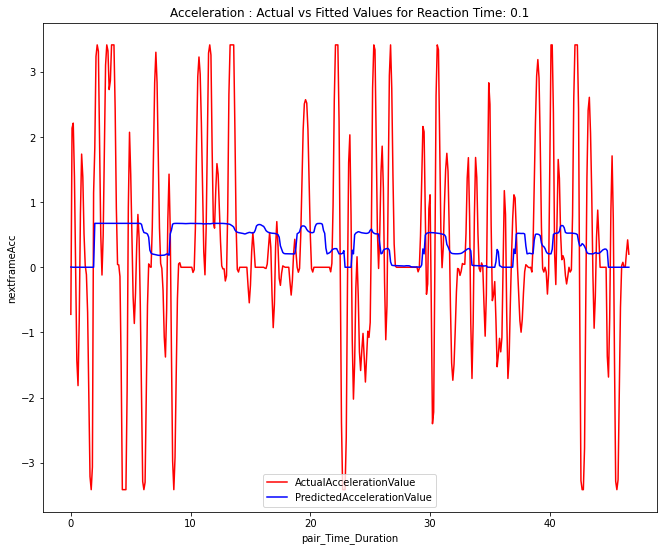

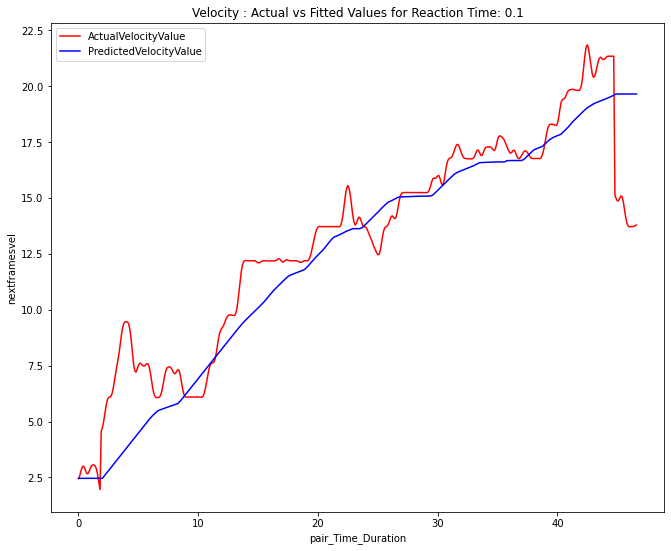

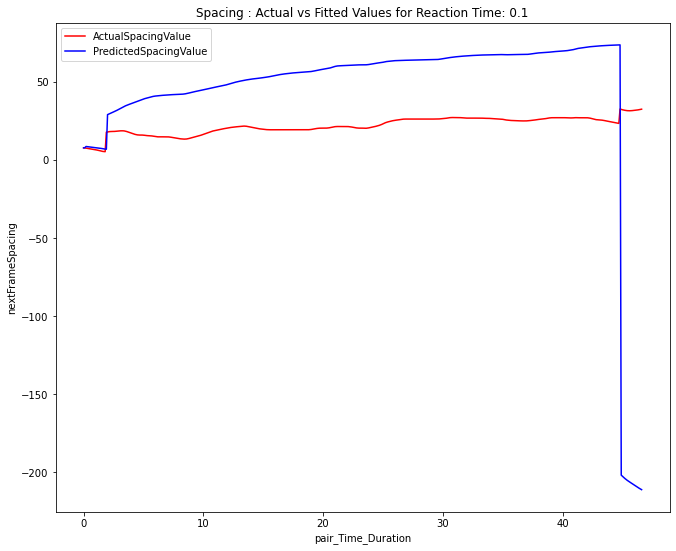

In [ ]:
model_obj.plot_prediction(input_df, 'pair_Time_Duration',
                        'predicted_acceleration', 'nextframeAcc', 'Acceleration', delta_time)
model_obj.plot_prediction(input_df, 'pair_Time_Duration',
                        'predicted_velocity', 'nextframesvel', 'Velocity', delta_time)
model_obj.plot_prediction(input_df, 'pair_Time_Duration',
                        'predicted_spacing', 'nextFrameSpacing', 'Spacing', delta_time)


In [ ]:
input_df

,Local_Y,v_Class,v_Vel,v_Acc,Following,Location,Rear_to_Front_Space_Headway,Front_To_Rear_Time_Headway,Velocity Difference_Following-Preceding,Acceleration Difference_Following-Preceding,...,nextframesvel,nextframeposition,nextFrameSpacing,precnextframeposition,precnextframesvel,predicted_acceleration,predicted_velocity,predicted_Local_Y,predicted_spacing,preceding_Local_Y_used
49376,28.442411,2,2.459736,0.359664,610,us-101,7.730744,3.142916,-0.484632,1.740408,...,2.447544,28.697529,7.767320,40.935555,2.773680,0.003353,2.459736,28.442411,7.730744,40.642948
49422,28.697529,2,2.447544,-0.722376,610,us-101,7.767320,3.173516,-0.326136,1.405128,...,2.563368,29.857903,7.685024,42.013935,1.630680,0.001221,2.460071,28.688402,7.776753,40.935555
49571,29.857903,2,2.563368,2.136648,610,us-101,7.685024,2.998018,0.932688,3.438144,...,2.773680,30.124298,7.569200,42.164814,1.542288,0.000448,2.460194,28.934415,8.609120,42.013935
49608,30.124298,2,2.773680,2.212848,610,us-101,7.569200,2.728938,1.231392,2.663952,...,2.947416,30.417820,7.425944,42.312946,1.514856,0.000448,2.460238,29.180437,8.513977,42.164814
49659,30.417820,2,2.947416,1.386840,610,us-101,7.425944,2.519476,1.432560,1.347216,...,3.008376,30.729021,7.264400,42.464127,1.517904,0.000448,2.460283,29.426463,8.416084,42.312946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221648,357.051849,2,13.712952,0.076200,609,us-101,31.816040,2.320145,-0.963168,-1.362456,...,13.716000,358.424072,31.916624,394.809875,14.837664,0.000444,19.646523,598.035274,-209.166745,393.338928
1221728,358.424072,2,13.716000,0.000000,609,us-101,31.916624,2.326963,-1.121664,-1.941576,...,13.716000,359.795685,32.038544,396.304016,15.020544,0.000444,19.646568,599.999928,-209.660452,394.809875
1221772,359.795685,2,13.716000,0.000000,609,us-101,32.038544,2.335852,-1.304544,-1.825752,...,13.731240,361.165741,32.184849,397.820068,15.160752,0.000444,19.646612,601.964587,-210.130971,396.304016
1221857,361.165741,2,13.731240,0.225552,609,us-101,32.184849,2.343914,-1.429512,-0.826008,...,13.761720,362.538879,32.340298,399.349579,15.203424,0.000444,19.646656,603.929250,-210.579582,397.820068


In [ ]:

fileProcessing.export_file(input_df,'input_df')

True